In [1]:
import os
from pathlib import Path
from ROOT import TFile, TMath, TF1, gROOT, TCanvas, TGraph, TGraphErrors, TH1F

Welcome to JupyROOT 6.26/06


In [2]:
def getall(d, basepath="/"):
    "Generator function to recurse into a ROOT file/dir and yield (path, obj) pairs"
    for key in d.GetListOfKeys():
        kname = key.GetName()
        if key.IsFolder():
            # TODO: -> "yield from" in Py3
            for i in getall(d.Get(kname), basepath+kname+"/"):
                yield i
        else:
            yield d.Get(kname)


In [3]:
folder_out=os.path.join(
    os.path.dirname(os.getcwd()),
    "04_ML_classification"
)
path_root = Path(folder_out)
files=[root_file.as_posix() for root_file in path_root.glob('**/*.root')]
files

['/home/crisfer2694/Desktop/Pheno_BSM/Leptoquarks_searches/04_ML_classification/MLQ_1500/b_tau_tau_hadronic/Gradient_Boosting.root']

z_jets_b_tau_tau_hadronic


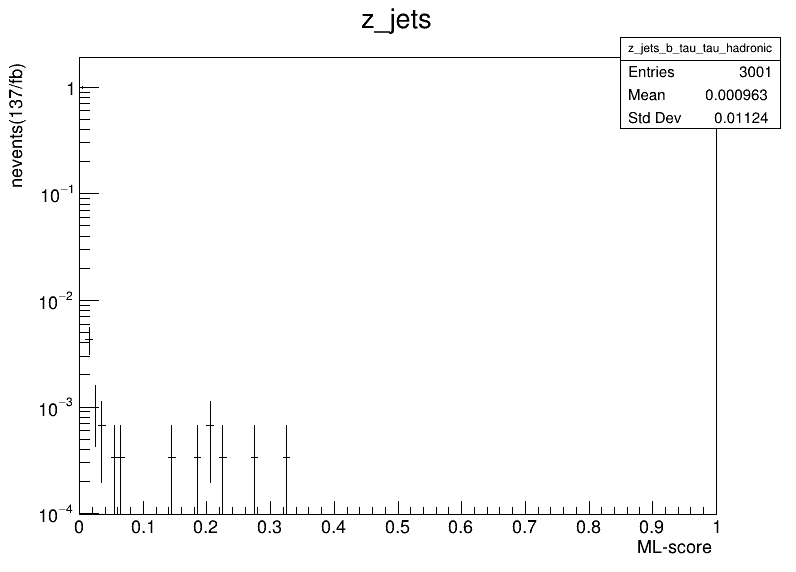

In [4]:
c1=TCanvas("","",800,600)
c1.SetLogy()
a=1
x=[]
y=[]
err_y=[]
for file in files:
    f=TFile(file)
    for h in getall(f):
        if not ( "z" in h.GetName()): continue
        #f1=TF1("f1","[0]*TMath::Landau(x,[1],[2])",0.5,1.)
        #f1=TF1("f1","[0]*TMath::Landau([3]*x*x*x*x*x*x,[1],[2])",0.,1.)
        #f1.SetParameter(0,1)
        #f1.SetParameter(1,0)
        #f1.SetParameter(2,1)
        #f1.SetParameter(6,1)
        h.Scale(1.0/h.Integral())
        #h.Fit("f1")
        h.Draw()
        print(h.GetName())
        sum_=0.
        erry=0.0
        dx=1./h.GetNbinsX()
        for i in range (h.GetNbinsX()):
            if h.GetBinContent(i+1) !=0 :
                x.append((i+1)*(1./h.GetNbinsX()))
                sum_+=h.GetBinContent(i+1)
                erry+=h.GetBinError(i+1)
                y.append(sum_)
                err_y.append(erry)
        break
    break
if x[len(x)-1]<1 :
    err_y.append(err_y[len(x)-1])
    x.append(1.)
    y.append(1.)
    

err_x=[dx/2 for i in x]
c1.Draw()

In [5]:
import numpy as np
from numpy import array
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.special import logit, expit
import math
import numpy 
x=np.array(x)
err_y=array(err_y)
y=array(y)
err_x=array(err_x)
y_sup=y+err_y
y_inf=y-err_y

y_sup=y_sup/max(y_sup)
y_inf=y_inf/max(y_inf)


"""
y=expit(y)
y_inf=expit(y_inf)
y_sup=expit(y_sup)

y=-np.log(y)
y_inf=-np.log(y_inf)
y_sup=-np.log(y_sup)
"""
interp_func_sup=PchipInterpolator(x, y_sup)
interp_func_inf=PchipInterpolator(x, y_inf)



In [6]:
interp_func = PchipInterpolator(x, y)
new_x = np.arange(0.0, 1.00, 1./10000.)
new_y_sup = interp_func_sup(new_x)
new_y_inf = interp_func_inf(new_x)

In [7]:

#tck = interpolate.splrep(x, y, s=0)
#new_y = interpolate.splev(new_x, tck, der=0)
#def interp_func(x):
#    return interpolate.splev(x, tck, der=0)

In [8]:
#(new_x,new_y)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


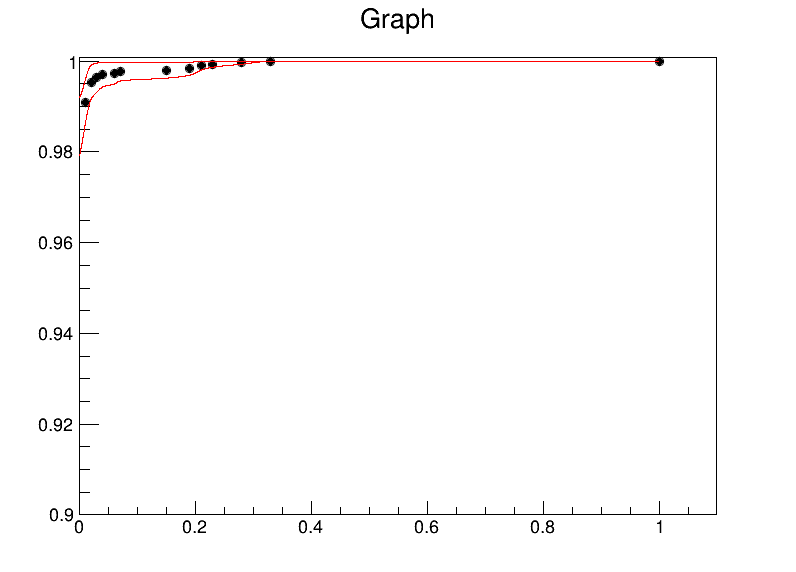

In [10]:
c1=TCanvas("c1","",800,600)
#c1.SetLogy()
p="[0]*x"
#f1=TF1("f1",f"-4+log({p}/(1-{p}))",0.0001,0.9999)
#f1.SetParameter(0,1)
#f1.SetParameter(1,1)
g=TGraphErrors(len(x),x,y)#,err_x,err_y)
g.SetMinimum(9e-1)
#g.SetMaximum(1)
g.SetMarkerStyle(8)
#g.Fit("f1")
#f1.SetParameter(0,1)
g2=TGraph(len(new_x),new_x,new_y_sup)
g2.SetLineColor(2)
g3=TGraph(len(new_x),new_x,new_y_inf)
g3.SetLineColor(2)
g.Draw("ap")
g2.Draw("l")
g3.Draw("l")
c1.Draw()

In [11]:
import random
import time
np.random.seed()
X=x
Y=[np.random.uniform(a, b) for a,b in zip(new_y_inf,new_y_sup)]

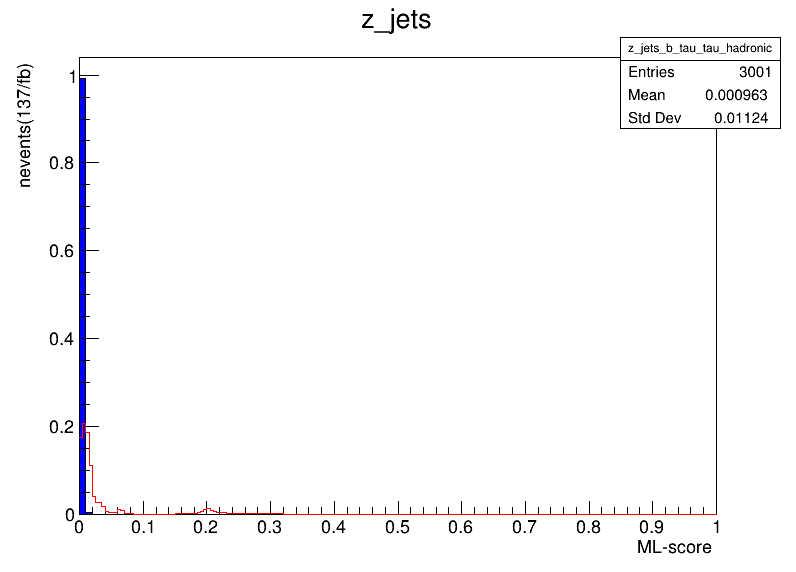

In [12]:
n_bins=200
hist_test=TH1F("test","test",n_bins,0.,1.)

for bin_ in range(hist_test.GetNbinsX()):
    hist_test.SetBinContent(bin_+1,interp_func((bin_+1)/n_bins)-interp_func((bin_)/n_bins))


hist_test.Scale(1./hist_test.Integral())
hist_test.SetLineColor(2)
h.Scale(hist_test.Integral()/h.Integral())
h.Draw("HIST")
hist_test.Draw("HISTsame")

c1.Draw()
